# THE SPARK FOUNDATION

# DATA SCIENCE AND BUSSINESS ANALYTICS INTERN

# Name- Rashi Agrawal

# task5- Exploratory Data Analysis on Indian Premier League

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
#importing dataset

matches=pd.read_csv("matches.csv")
delivery=pd.read_csv("deliveries.csv")

In [3]:
#first 5 rows of data
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
#shape of dataset
matches.shape

(756, 18)

In [5]:
#basic information about dataset
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [6]:
matches.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [7]:
#number of unique value present in each column
matches.nunique()

id                 756
season              12
city                32
date               546
team1               15
team2               15
toss_winner         15
toss_decision        2
result               3
dl_applied           2
winner              15
win_by_runs         89
win_by_wickets      11
player_of_match    226
venue               41
umpire1             61
umpire2             65
umpire3             25
dtype: int64

In [8]:
#number of null value present in each column
matches.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

column(city,winner,player_of_match,umpire1,umpire2,umpire3)has null values

In [9]:
#first 5 rows of data
delivery.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [10]:
#shape of dataset
delivery.shape

(179078, 21)

In [11]:
#basic information about dataset
delivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [12]:
delivery.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


In [13]:
#number of unique value present in each column
delivery.nunique()

match_id            756
inning                5
batting_team         15
bowling_team         15
over                 20
ball                  9
batsman             516
non_striker         511
bowler              405
is_super_over         2
wide_runs             6
bye_runs              5
legbye_runs           6
noball_runs           5
penalty_runs          2
batsman_runs          8
extra_runs            7
total_runs           10
player_dismissed    487
dismissal_kind        9
fielder             499
dtype: int64

In [14]:
#number of null value present in each column
delivery.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

In [15]:
#merging of both dataset
data=pd.merge(delivery,matches,left_on='match_id',right_on='id')
data.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN


In [16]:
data.shape

(179078, 39)

# data visualizing

In [17]:
#matches played in each season
matches_season = pd.DataFrame({"Year":matches["season"].value_counts().keys(), "Matches":matches["season"].value_counts().values})
matches_season = matches_season.sort_values(by = "Year", ascending = True)
matches_season

,Year,Matches
10,2008,58
11,2009,57
3,2010,60
2,2011,73
1,2012,74
0,2013,76
4,2014,60
9,2015,59
5,2016,60
8,2017,59


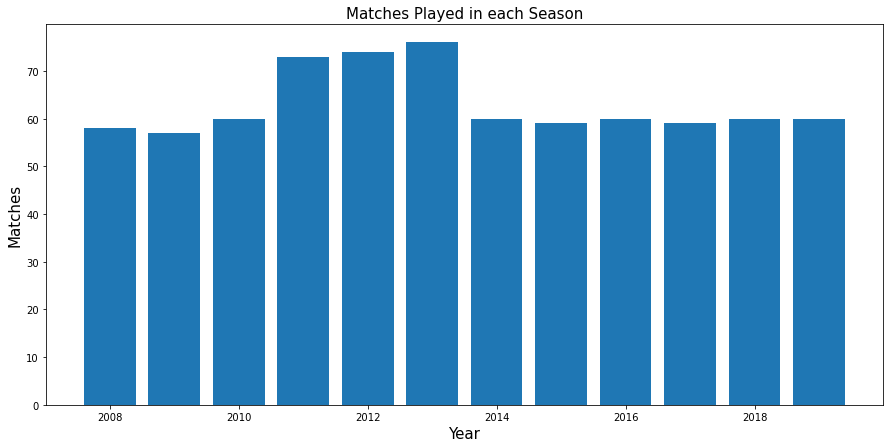

In [18]:
#graph plot of above dataframe
plt.figure(figsize=(15,7))
plt.bar(matches_season["Year"],matches_season["Matches"])
plt.xlabel("Year",fontsize=15)
plt.ylabel("Matches",fontsize=15)
plt.title("Matches Played in each Season", fontsize=15)
plt.show()

In [19]:
#matches played in each stadium
matches_venue = pd.DataFrame({"venue":matches["venue"].value_counts().keys(), "Matches":matches["venue"].value_counts().values})
matches_venue

,venue,Matches
0,Eden Gardens,77
1,M Chinnaswamy Stadium,73
2,Wankhede Stadium,73
3,Feroz Shah Kotla,67
4,"Rajiv Gandhi International Stadium, Uppal",56
5,"MA Chidambaram Stadium, Chepauk",49
6,Sawai Mansingh Stadium,47
7,"Punjab Cricket Association Stadium, Mohali",35
8,Maharashtra Cricket Association Stadium,21
9,Subrata Roy Sahara Stadium,17


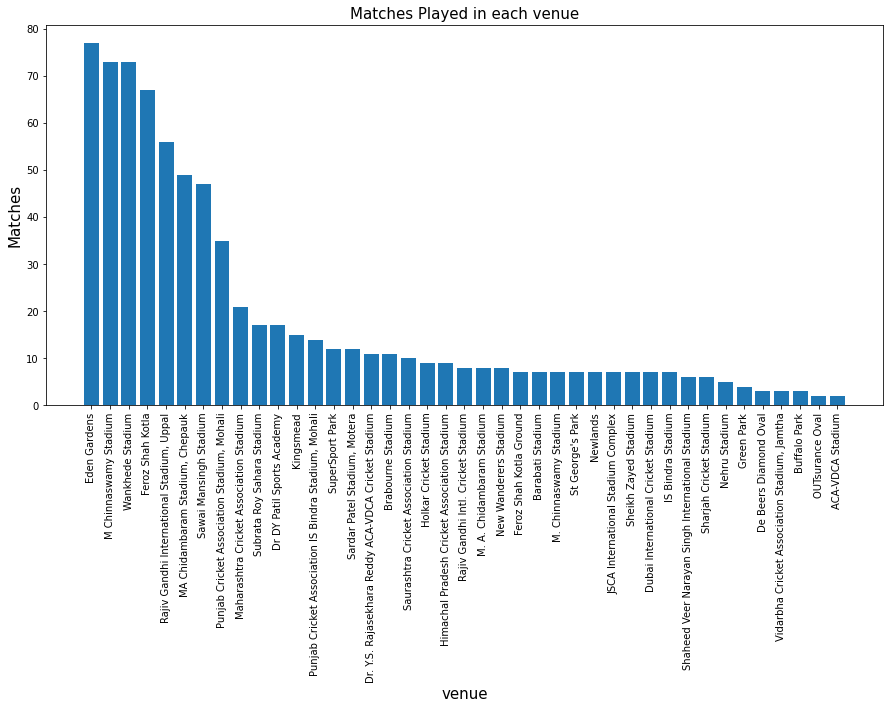

In [20]:
#graph representation of above dataframe
plt.figure(figsize=(15,7))
plt.bar(matches_venue["venue"],matches_venue["Matches"])
plt.xlabel("venue",fontsize=15)
plt.xticks(rotation=90)
plt.ylabel("Matches",fontsize=15)
plt.title("Matches Played in each venue", fontsize=15)
plt.show()

In [21]:
#toss win by each team
matches["toss_winner"].value_counts()

Mumbai Indians                 98
Kolkata Knight Riders          92
Chennai Super Kings            89
Royal Challengers Bangalore    81
Kings XI Punjab                81
Delhi Daredevils               80
Rajasthan Royals               80
Sunrisers Hyderabad            46
Deccan Chargers                43
Pune Warriors                  20
Gujarat Lions                  15
Delhi Capitals                 10
Kochi Tuskers Kerala            8
Rising Pune Supergiants         7
Rising Pune Supergiant          6
Name: toss_winner, dtype: int64

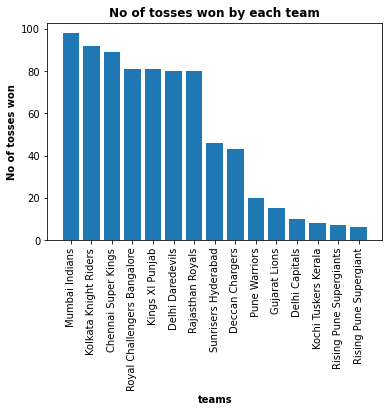

In [22]:
#graph representation of above dataframe
plt.bar(matches["toss_winner"].value_counts().keys(),matches["toss_winner"].value_counts().values)
plt.xlabel("teams",fontweight = "bold")
plt.xticks(rotation=90)
plt.ylabel("No of tosses won",fontweight = "bold")
plt.title("No of tosses won by each team", fontweight = "bold")
plt.show()

In [23]:
#toss decision of toss winner
matches['toss_decision'].value_counts()

field    463
bat      293
Name: toss_decision, dtype: int64

([<matplotlib.patches.Wedge at 0x1754e9ac4c0>,
 [Text(-0.3805142883934777, 1.032089567977705, ''),
  Text(0.3805142883934778, -1.032089567977705, '')],
 [Text(-0.20755324821462415, 0.5629579461696571, '61.2%'),
  Text(0.20755324821462423, -0.5629579461696571, '38.8%')])

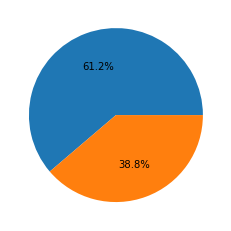

In [24]:
#piechart representation of above dataframe
plt.pie(matches['toss_decision'].value_counts(),autopct='%1.1f%%')

Text(0, 0.5, 'Frequency')

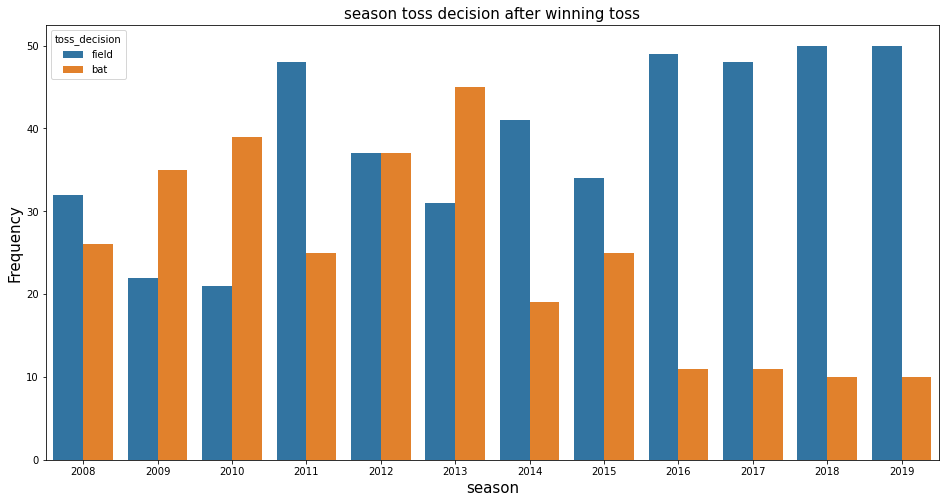

In [30]:
#graph representation of toss decision in each season
plt.figure(figsize=(16,8))
sns.countplot(x='season',data=matches,hue='toss_decision')
plt.title('season toss decision after winning toss',fontsize=15)
plt.xlabel('season',fontsize=15)
plt.ylabel('Frequency',fontsize=15)

Text(0, 0.5, 'Frequency')

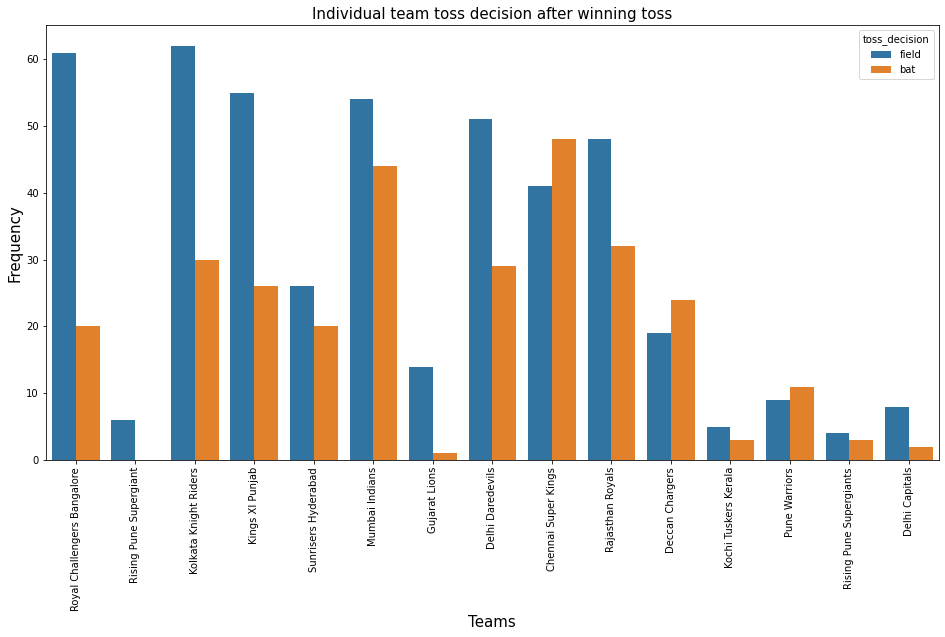

In [25]:
#graph representation of toss decision by toss winner
plt.figure(figsize=(16,8))
sns.countplot(x='toss_winner',data=matches,hue='toss_decision')
plt.title('Individual team toss decision after winning toss',fontsize=15)
plt.xlabel('Teams',fontsize=15)
plt.xticks(rotation=90)
plt.ylabel('Frequency',fontsize=15)

In [27]:
matches["result"].value_counts()

normal       743
tie            9
no result      4
Name: result, dtype: int64

([<matplotlib.patches.Wedge at 0x1754ee082b0>,
 [Text(-1.0983952786770845, 0.059395385173346235, ''),
  Text(1.0972563065182481, -0.07764404552785949, ''),
  Text(1.0998480408648454, -0.01828351732466672, '')],
 [Text(-0.5991246974602278, 0.03239748282182522, '98.3%'),
  Text(0.5985034399190444, -0.042351297560650626, '1.2%'),
  Text(0.5999171131990065, -0.009972827631636393, '0.5%')])

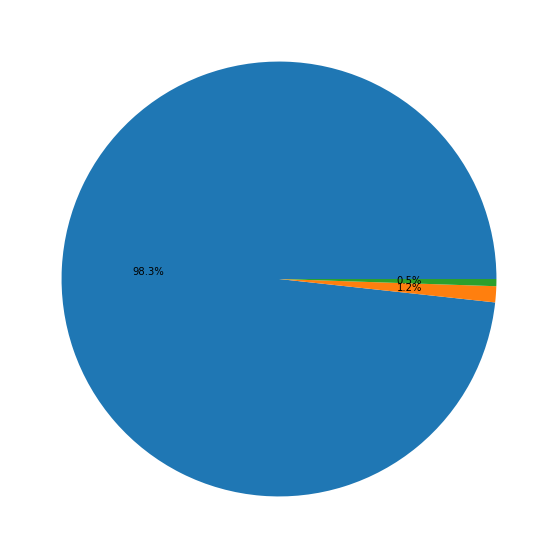

In [28]:
#pie chart representation of above dataframe
plt.figure(figsize=(10,10))
plt.pie(matches['result'].value_counts(),autopct='%1.1f%%')

In [37]:
#number of matches won by batting 1st team
batting_1st_winner= matches[matches["win_by_runs"]!=0]
batting_1st_winner.shape

(337, 18)

In [38]:
#number of matches won by batting 2nd team
batting_2nd_winner= matches[matches["win_by_wickets"]!=0]
batting_2nd_winner.shape

(406, 18)

In [41]:
#kind and number of wickets
delivery['dismissal_kind'].value_counts()

caught                   5348
bowled                   1581
run out                   852
lbw                       540
stumped                   278
caught and bowled         211
retired hurt               12
hit wicket                 10
obstructing the field       2
Name: dismissal_kind, dtype: int64

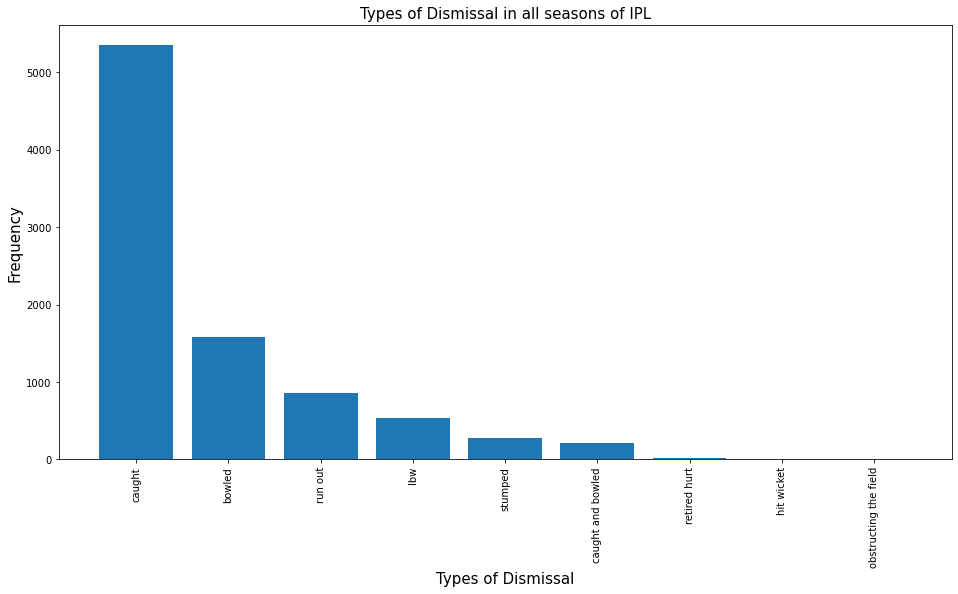

In [43]:
#graph representation of above dataframe
plt.figure(figsize=(16,8))
plt.bar(delivery['dismissal_kind'].value_counts().keys(),delivery['dismissal_kind'].value_counts().values)
plt.title('Types of Dismissal in all seasons of IPL', fontsize=15)
plt.xlabel('Types of Dismissal', fontsize=15)
plt.xticks(rotation=90)
plt.ylabel('Frequency', fontsize=15)
plt.show()

In [48]:
#most successful batsman
batsman_runs = delivery.groupby("batsman")["batsman_runs"].sum().reset_index()
batsman_runs=batsman_runs.sort_values(by="batsman_runs", ascending = False).reset_index().drop("index",axis =1).head(15)
batsman_runs

,batsman,batsman_runs
0,V Kohli,5434
1,SK Raina,5415
2,RG Sharma,4914
3,DA Warner,4741
4,S Dhawan,4632
5,CH Gayle,4560
6,MS Dhoni,4477
7,RV Uthappa,4446
8,AB de Villiers,4428
9,G Gambhir,4223


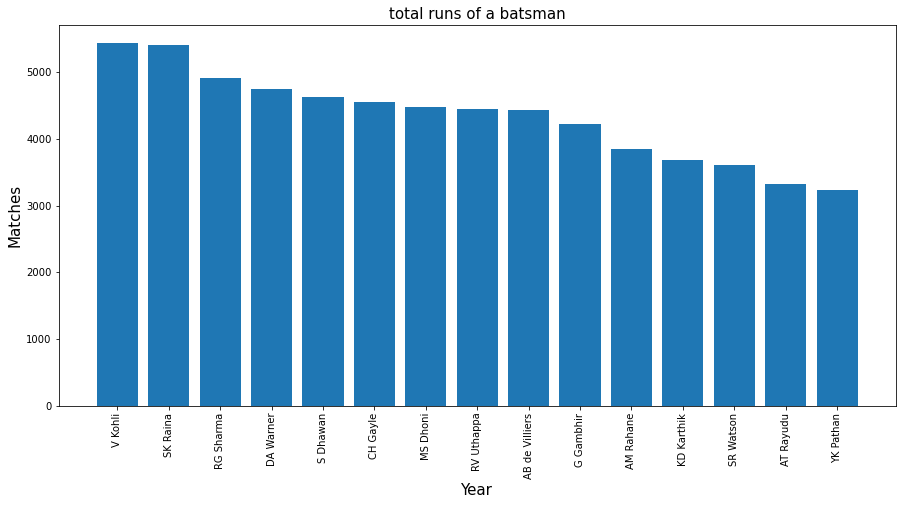

In [54]:
#graph plot of above dataframe
plt.figure(figsize=(15,7))
plt.bar(batsman_runs["batsman"],batsman_runs["batsman_runs"])
plt.xlabel("Year",fontsize=15)
plt.xticks(rotation=90)
plt.ylabel("Matches",fontsize=15)
plt.title("total runs of a batsman", fontsize=15)
plt.show()

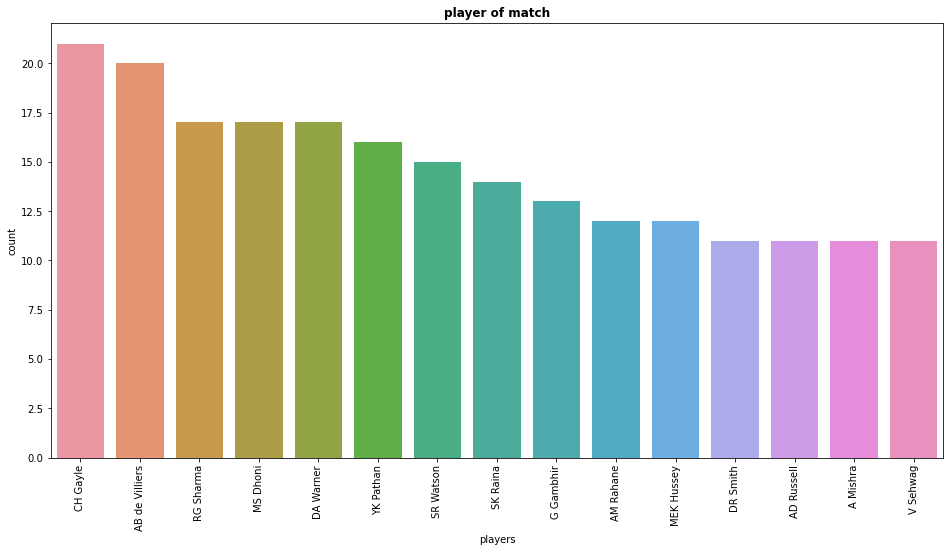

In [47]:
#graph representation of 15 player winning most of the player of match
plt.figure(figsize=(16,8))
sns.countplot(x='player_of_match',data=matches,order=data['player_of_match'].value_counts().head(15).index)
plt.xlabel("players")
plt.xticks(rotation=90)
plt.title("player of match", fontweight = "bold")
plt.show()

In [52]:
#most successful fielder
delivery["fielder"].value_counts().head(15)

MS Dhoni          159
KD Karthik        152
RV Uthappa        125
SK Raina          115
AB de Villiers    114
PA Patel           97
RG Sharma          92
V Kohli            90
KA Pollard         85
NV Ojha            82
WP Saha            82
RA Jadeja          80
DJ Bravo           78
MK Pandey          77
AC Gilchrist       75
Name: fielder, dtype: int64

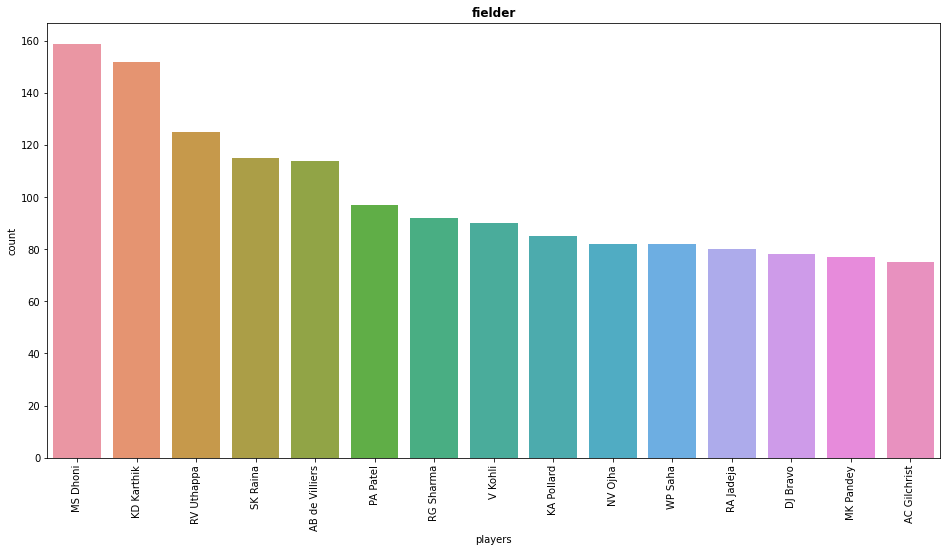

In [53]:
#graph representation of above dataframe
plt.figure(figsize=(16,8))
sns.countplot(x='fielder',data=delivery,order=data['fielder'].value_counts().head(15).index)
plt.xlabel("players")
plt.xticks(rotation=90)
plt.title("fielder", fontweight = "bold")
plt.show()